In [0]:
from zipfile import ZipFile
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.python.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline
# import the libraries as shown below



Using TensorFlow backend.


In [0]:
 zf=ZipFile("/content/drive/My Drive/Chest.zip")
 zf.extractall(path='Chest')
 zf.close()


In [0]:
s=32
IMAGE_SIZE = [224, 224]
trainGen=ImageDataGenerator(rescale=1./255,shear_range= 0.2,zoom_range= 0.2,horizontal_flip= True,rotation_range= 40,width_shift_range = 0.2,height_shift_range = 0.2)

In [0]:
train_set=trainGen.flow_from_directory('/content/Chest/chest_xray/train',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
test_set=trainGen.flow_from_directory('/content/Chest/chest_xray/test',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')
val_set=trainGen.flow_from_directory('/content/Chest/chest_xray/val',target_size = (224, 224),batch_size = 32,class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


In [0]:

for layer in res.layers:
    layer.trainable = False

In [0]:

folders = glob('/content/Chest/chest_xray/train/*')

In [0]:

x = Flatten()(res.output)

In [0]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=res.input, outputs=prediction)

In [0]:


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [0]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_set,
  validation_data=val_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
163/163 [==============================] - 62s 378ms/step - loss: 0.5497 - acc: 0.9532 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
163/163 [==============================] - 52s 320ms/step - loss: 0.3063 - acc: 0.9770 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
163/163 [==============================] - 52s 317ms/step - loss: 0.2758 - acc: 0.9791 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
163/163 [==============================] - 52s 317ms/step - loss: 0.2441 - acc: 0.9818 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
163/163 [==============================] - 52s 320ms/step - loss: 0.2404 - acc: 0.9827 - val_loss: 8.0590 - val_acc: 0.5000


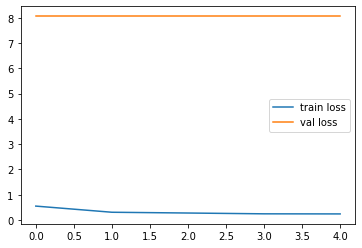

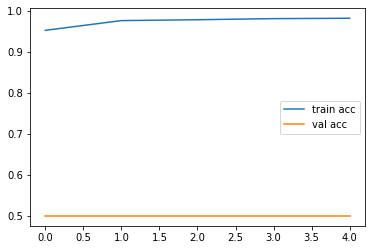

<Figure size 432x288 with 0 Axes>

In [0]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')